In [1]:
import pandas as pd
from evaluate import load
wer = load("wer")

/Users/astrid/Desktop/hviskmigioeret/audio_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#load results pd df
results = pd.read_csv("../data/results.csv")
results


,file,folketinget,whisper-tiny,whisper-small,whisper-medium,whisper-large-v2,hviske
0,Alexander Ryle_video_40_start_3-42-15,Mange tak. Når et byggeri eller etableringen a...,Og med byggeri eller et tablering af infrastr...,Om et byggeri eller etablering af infrastrukt...,Om et byggeri eller etablering af infrastrukt...,Om et byggeri eller etablering af infrastrukt...,Og om et byggeri eller etablering af infrastru...
1,Alexander Ryle_video_40_start_3-45-24,"Altså, det er jo vores generelle opfattelse, a...",Der er det jo vores generellt opfærdelsværdet...,"Det er vores generelle opfattelse, at et lov,...","Det er vores generelle opfattelse, at loven, ...","Det er vores generelle opfattelse, at loven, ...","Det er jo vores generelle opfattelse, at loven..."
2,Anders Kronborg_video_41_start_3-38-46,Først og fremmest vil jeg sige tak for en god ...,"Så var det en god vorte, at det var en afmæst...","Så frem, synes jeg, at tak for en god overfør...","Jeg synes, at jeg er tak for en god ordførtal...","Jeg vil bare fremme, at jeg synes, at jeg er ...","Fremad synes jeg tak for en god ordførertale, ..."
3,Anders Kronborg_video_41_start_4-33-32,"Tak for det, og tak for en, synes jeg, tale, d...",I en tag for det er og tagt synes jeg også fo...,"Tak for det, og tak synes jeg også for en tal...","Jamen tak for det, og tak synes jeg også for ...","Tak for det, og tak, synes jeg også, for en t...","Jamen, tak for det, og tak, synes jeg, også fo..."
4,Betina Kastbjerg_video_44_start_4-22-20,"Tak for ordet, formand. Beslutningsforslaget, ...","Bistotusforslædelsen viske drøft i dag, det e...","Beslutningsforslaget, som vi skal drifte i da...","Beslutningsforslaget, som vi skal drøfte i da...","Beslutningsforslaget, som vi skal drøfte i da...","Beslutningsforslaget, som vi skal drøfte i dag..."
...,...,...,...,...,...,...,...
90,Steffen Larsen_video_44_start_3-24-01,"Tak for det, hr. formand. Beslutningsforslaget...","Det er en slødningsvorslede, vi behandler her...",Beslutningsforslaget vi behandler her om hand...,Beslutningsforslaget omhandler gennemførelsen...,Beslutningsforslaget vi behandler her omhandl...,"Beslutningsforslaget, vi behandler her, omhand..."
91,Søren Egge Rasmussen_video_40_start_0-24-56,"Jeg vil altså hellere have, at det er Folketin...",Hvad har det folket tænkte at styr udviklinge...,Det er en grundholdning. I sætter man har et ...,"Det er ikke folketingen, der styrer udvikling...","Jeg vil gerne have, at det er Folketinget, de...","Jeg vil gerne have det i folketinget, der stør..."
92,Søren Egge Rasmussen_video_40_start_1-09-48,Tak. Der var nogle gode intentioner i minister...,"Jeg tager, der var nogle god en centrum, der ...","Ja tak. Når Ministeren siger, at det er et pl...","Ja tak. Når ministeren siger, at det er et pl...",Der var nogle gode intentioner i ministerens ...,Jeg tak.Der var nogle gode intentioner i minis...
93,Søren Egge Rasmussen_video_40_start_2-32-23,"Jo, med hensyn til herregårdslandskaber er der...","Læmpe som er der ikke, vil stærse den kommune...","landskaber. Der er sket en læmpelse, men der ...","Der er jo ikke sket en lempelse, hvis en komm...","Der er sket en lempelse, men der er jo ikke s...","I vore landskaber er der sket en lempelse, hvi..."


In [3]:
# Assuming 'results' is your DataFrame
columns = results.columns
columns_to_evaluate = columns[2:]  # Adjust as needed

wer = load("wer")

# Function to compute WER for a single row for given columns
def compute_wer_for_row(row, column_name):
    reference_str = row['folketinget']
    prediction_str = row[column_name]
    wer_score = wer.compute(predictions=[prediction_str], references=[reference_str])
    return wer_score

# Iterate over each column that needs to be evaluated
for column in columns_to_evaluate:
    # Compute WER for each row and store the results in a new column
    new_column_name = f"{column}_WER"  # Name for the new column holding WER scores
    
    # Use .loc to avoid SettingWithCopyWarning
    results.loc[:, new_column_name] = results.apply(lambda row: compute_wer_for_row(row, column), axis=1)


In [4]:
# take the last 5 columns and multiply by 100 to get percentage, round to 2 decimals
results.iloc[:,-5:] = results.iloc[:,-5:]*100
results.iloc[:,-5:] = results.iloc[:,-5:].round(2)


In [5]:
results

,file,folketinget,whisper-tiny,whisper-small,whisper-medium,whisper-large-v2,hviske,whisper-tiny_WER,whisper-small_WER,whisper-medium_WER,whisper-large-v2_WER,hviske_WER
0,Alexander Ryle_video_40_start_3-42-15,Mange tak. Når et byggeri eller etableringen a...,Og med byggeri eller et tablering af infrastr...,Om et byggeri eller etablering af infrastrukt...,Om et byggeri eller etablering af infrastrukt...,Om et byggeri eller etablering af infrastrukt...,Og om et byggeri eller etablering af infrastru...,69.55,28.72,21.11,18.34,34.26
1,Alexander Ryle_video_40_start_3-45-24,"Altså, det er jo vores generelle opfattelse, a...",Der er det jo vores generellt opfærdelsværdet...,"Det er vores generelle opfattelse, at et lov,...","Det er vores generelle opfattelse, at loven, ...","Det er vores generelle opfattelse, at loven, ...","Det er jo vores generelle opfattelse, at loven...",76.13,32.90,29.68,40.65,65.16
2,Anders Kronborg_video_41_start_3-38-46,Først og fremmest vil jeg sige tak for en god ...,"Så var det en god vorte, at det var en afmæst...","Så frem, synes jeg, at tak for en god overfør...","Jeg synes, at jeg er tak for en god ordførtal...","Jeg vil bare fremme, at jeg synes, at jeg er ...","Fremad synes jeg tak for en god ordførertale, ...",95.58,32.04,28.73,24.31,32.60
3,Anders Kronborg_video_41_start_4-33-32,"Tak for det, og tak for en, synes jeg, tale, d...",I en tag for det er og tagt synes jeg også fo...,"Tak for det, og tak synes jeg også for en tal...","Jamen tak for det, og tak synes jeg også for ...","Tak for det, og tak, synes jeg også, for en t...","Jamen, tak for det, og tak, synes jeg, også fo...",85.06,48.05,40.26,38.31,84.42
4,Betina Kastbjerg_video_44_start_4-22-20,"Tak for ordet, formand. Beslutningsforslaget, ...","Bistotusforslædelsen viske drøft i dag, det e...","Beslutningsforslaget, som vi skal drifte i da...","Beslutningsforslaget, som vi skal drøfte i da...","Beslutningsforslaget, som vi skal drøfte i da...","Beslutningsforslaget, som vi skal drøfte i dag...",85.67,35.83,21.82,21.17,30.62
...,...,...,...,...,...,...,...,...,...,...,...,...
90,Steffen Larsen_video_44_start_3-24-01,"Tak for det, hr. formand. Beslutningsforslaget...","Det er en slødningsvorslede, vi behandler her...",Beslutningsforslaget vi behandler her om hand...,Beslutningsforslaget omhandler gennemførelsen...,Beslutningsforslaget vi behandler her omhandl...,"Beslutningsforslaget, vi behandler her, omhand...",86.33,52.76,19.90,44.36,37.17
91,Søren Egge Rasmussen_video_40_start_0-24-56,"Jeg vil altså hellere have, at det er Folketin...",Hvad har det folket tænkte at styr udviklinge...,Det er en grundholdning. I sætter man har et ...,"Det er ikke folketingen, der styrer udvikling...","Jeg vil gerne have, at det er Folketinget, de...","Jeg vil gerne have det i folketinget, der stør...",211.86,67.80,44.92,37.29,93.22
92,Søren Egge Rasmussen_video_40_start_1-09-48,Tak. Der var nogle gode intentioner i minister...,"Jeg tager, der var nogle god en centrum, der ...","Ja tak. Når Ministeren siger, at det er et pl...","Ja tak. Når ministeren siger, at det er et pl...",Der var nogle gode intentioner i ministerens ...,Jeg tak.Der var nogle gode intentioner i minis...,81.35,56.35,44.84,24.60,53.97
93,Søren Egge Rasmussen_video_40_start_2-32-23,"Jo, med hensyn til herregårdslandskaber er der...","Læmpe som er der ikke, vil stærse den kommune...","landskaber. Der er sket en læmpelse, men der ...","Der er jo ikke sket en lempelse, hvis en komm...","Der er sket en lempelse, men der er jo ikke s...","I vore landskaber er der sket en lempelse, hvi...",83.24,41.62,35.84,28.32,38.73


In [6]:
# save results
results.to_csv("../data/WER.csv", index=False)

In [7]:
import pandas as pd

# Assuming 'results' is your DataFrame containing the WER columns
columns_wer = [
    'whisper-tiny_WER',
    'whisper-small_WER',
    'whisper-medium_WER',
    'whisper-large-v2_WER',
    'hviske_WER'
]

# List to hold each model's WER statistics
stats_list = []

# Calculate statistics for each model
for column in columns_wer:
    min_wer = results[column].min()
    max_wer = results[column].max()
    mean_wer = results[column].mean()
    # add median
    median_wer = results[column].median()
    
    # Create a dictionary of the stats and add it to the list
    stats_dict = {
        'Model': column.replace('_WER', ''),  # Clean up the model name
        'Min WER': min_wer,
        'Max WER': max_wer,
        'Mean WER': round(mean_wer,2),
        'Median WER': median_wer
    }
    stats_list.append(stats_dict)

# Create a DataFrame from the list of dictionaries
summary_matrix = pd.DataFrame(stats_list)

# Display the summary matrix
print(summary_matrix)


              Model  Min WER  Max WER  Mean WER  Median WER
0      whisper-tiny    60.27   2225.0    127.96       83.85
1     whisper-small    22.83    800.0     57.45       47.57
2    whisper-medium    12.60    875.0     47.99       38.66
3  whisper-large-v2    12.42    925.0     46.96       36.94
4            hviske    12.60   2475.0     74.90       43.27


/var/folders/fy/dq076l2x6h193qvwcs1f0qm00000gn/T/ipykernel_24508/1177555243.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results[column], label=column, shade=True)
/var/folders/fy/dq076l2x6h193qvwcs1f0qm00000gn/T/ipykernel_24508/1177555243.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results[column], label=column, shade=True)
/var/folders/fy/dq076l2x6h193qvwcs1f0qm00000gn/T/ipykernel_24508/1177555243.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results[column], label=column, shade=True)
/var/folders/fy/dq076l2x6h193qvwcs1f0qm00000gn/T/ipykernel_24508/1177555243.py:22: FutureWarning: 

`shade` is n

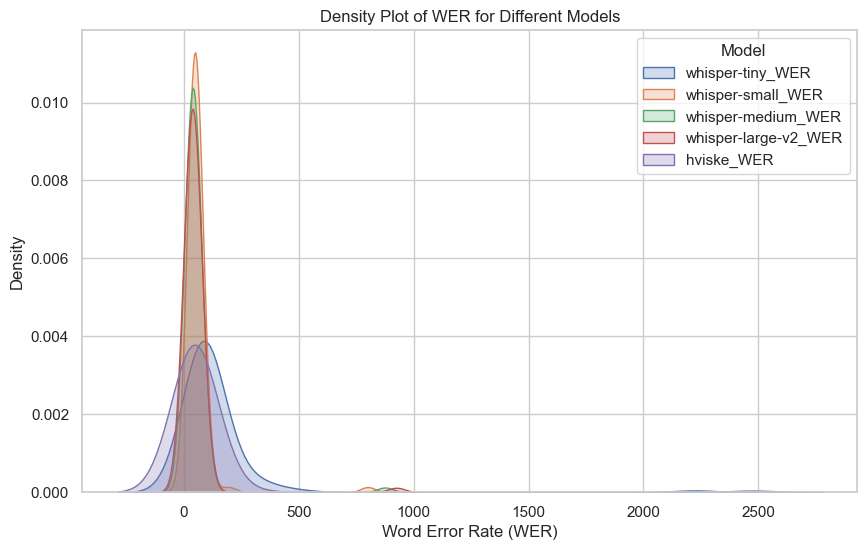

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame containing the WER columns
columns_wer = [
    'whisper-tiny_WER',
    'whisper-small_WER',
    'whisper-medium_WER',
    'whisper-large-v2_WER',
    'hviske_WER'
]

# Set the style of the visualization
sns.set(style="whitegrid")

# Prepare the figure
plt.figure(figsize=(10, 6))

# Plot density plots for each WER column
for column in columns_wer:
    sns.kdeplot(results[column], label=column, shade=True)

# Customize the plot with titles, labels, legend, and now x-axis limits
plt.title('Density Plot of WER for Different Models')
plt.xlabel('Word Error Rate (WER)')
plt.ylabel('Density')
plt.legend(title='Model')

# Set the x-axis limits
#plt.xlim(-3, 4)  # For example, limiting the WER from 0 to 1

# Show the plot
plt.show()


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame containing the WER columns
columns_wer = [
    'whisper-tiny_WER',
    'whisper-small_WER',
    'whisper-medium_WER',
    'whisper-large-v2_WER',
    'hviske_WER'
]

# Melt the DataFrame to long format for easier plotting with seaborn
long_format_df = results.melt(value_vars=columns_wer, var_name='Model', value_name='WER')

# Optionally, you can rename the models for a cleaner presentation
long_format_df['Model'] = long_format_df['Model'].str.replace('_WER', '')


In [10]:
long_format_df

,Model,WER
0,whisper-tiny,69.55
1,whisper-tiny,76.13
2,whisper-tiny,95.58
3,whisper-tiny,85.06
4,whisper-tiny,85.67
...,...,...
470,hviske,37.17
471,hviske,93.22
472,hviske,53.97
473,hviske,38.73


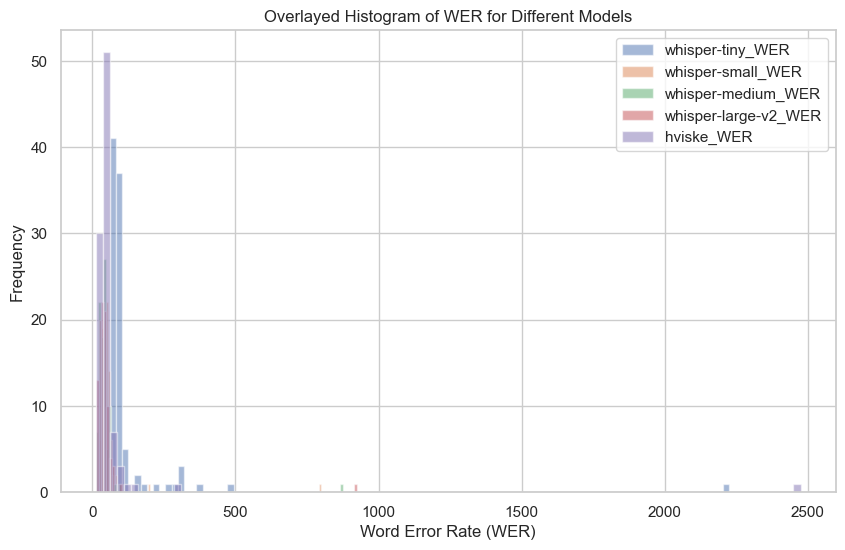

In [11]:
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame
columns_wer = [
    'whisper-tiny_WER',
    'whisper-small_WER',
    'whisper-medium_WER',
    'whisper-large-v2_WER',
    'hviske_WER'
]

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over the columns and plot histograms
for column in columns_wer:
    # Use alpha to control transparency: 1 is opaque, 0 is transparent
    plt.hist(results[column].dropna(), bins=100, alpha=0.5, label=column)

# Customize the plot
plt.title('Overlayed Histogram of WER for Different Models')
plt.xlabel('Word Error Rate (WER)')
plt.ylabel('Frequency')
plt.legend()  # Display the legend to identify models
#plt.xlim(0, 100)  # For example, limiting the WER from 0 to 1

plt.show()


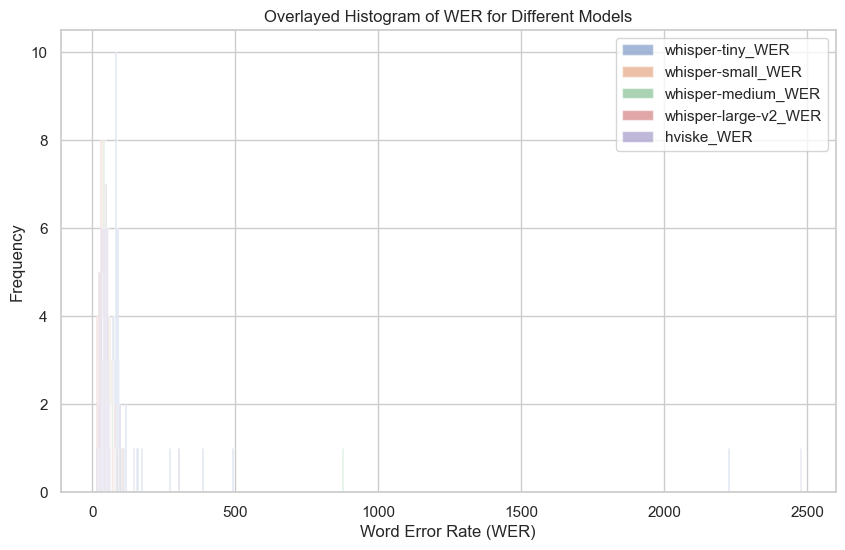

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is your DataFrame
columns_wer = [
    'whisper-tiny_WER',
    'whisper-small_WER',
    'whisper-medium_WER',
    'whisper-large-v2_WER',
    'hviske_WER'
]

# Desired bin width
desired_bin_width = 2

plt.figure(figsize=(10, 6))

# Iterate over each WER column to plot histograms
for column in columns_wer:
    data = results[column].dropna()  # Drop NaN values for accurate representation
    
    # Calculate the number of bins using the desired bin width
    min_data, max_data = data.min(), data.max()
    bins = np.arange(min_data, max_data + desired_bin_width, desired_bin_width)
    
    # Plot the histogram with the calculated bins
    plt.hist(data, bins=bins, alpha=0.5, label=column)

# Customize the plot
plt.title('Overlayed Histogram of WER for Different Models')
plt.xlabel('Word Error Rate (WER)')
plt.ylabel('Frequency')
plt.legend()
#plt.xlim(0, 100)  # For example, limiting the WER from 0 to 1

plt.show()
